In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [26]:
from sklearn.metrics import confusion_matrix, normalized_mutual_info_score, adjusted_rand_score, silhouette_score

## Question 1

#### Chargement des données

In [5]:
from sklearn.datasets import load_iris

X,y = load_iris(return_X_y = True)
iris = load_iris()
feature_names = iris.feature_names
target_names = iris.target_names

#### Conversion des données en DataFrame pour faciliter la visualisation

In [11]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1:'versicolor', 2:'virginica'})

print("Aperçu du dataset Iris :")
print(df.head(10))
print("\nDimensions:", df.shape)

Aperçu du dataset Iris :
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4    

## Question 2
#### Visualisation des données en 2D - toutes les combinaisons de paires

<Figure size 1500x1000 with 0 Axes>

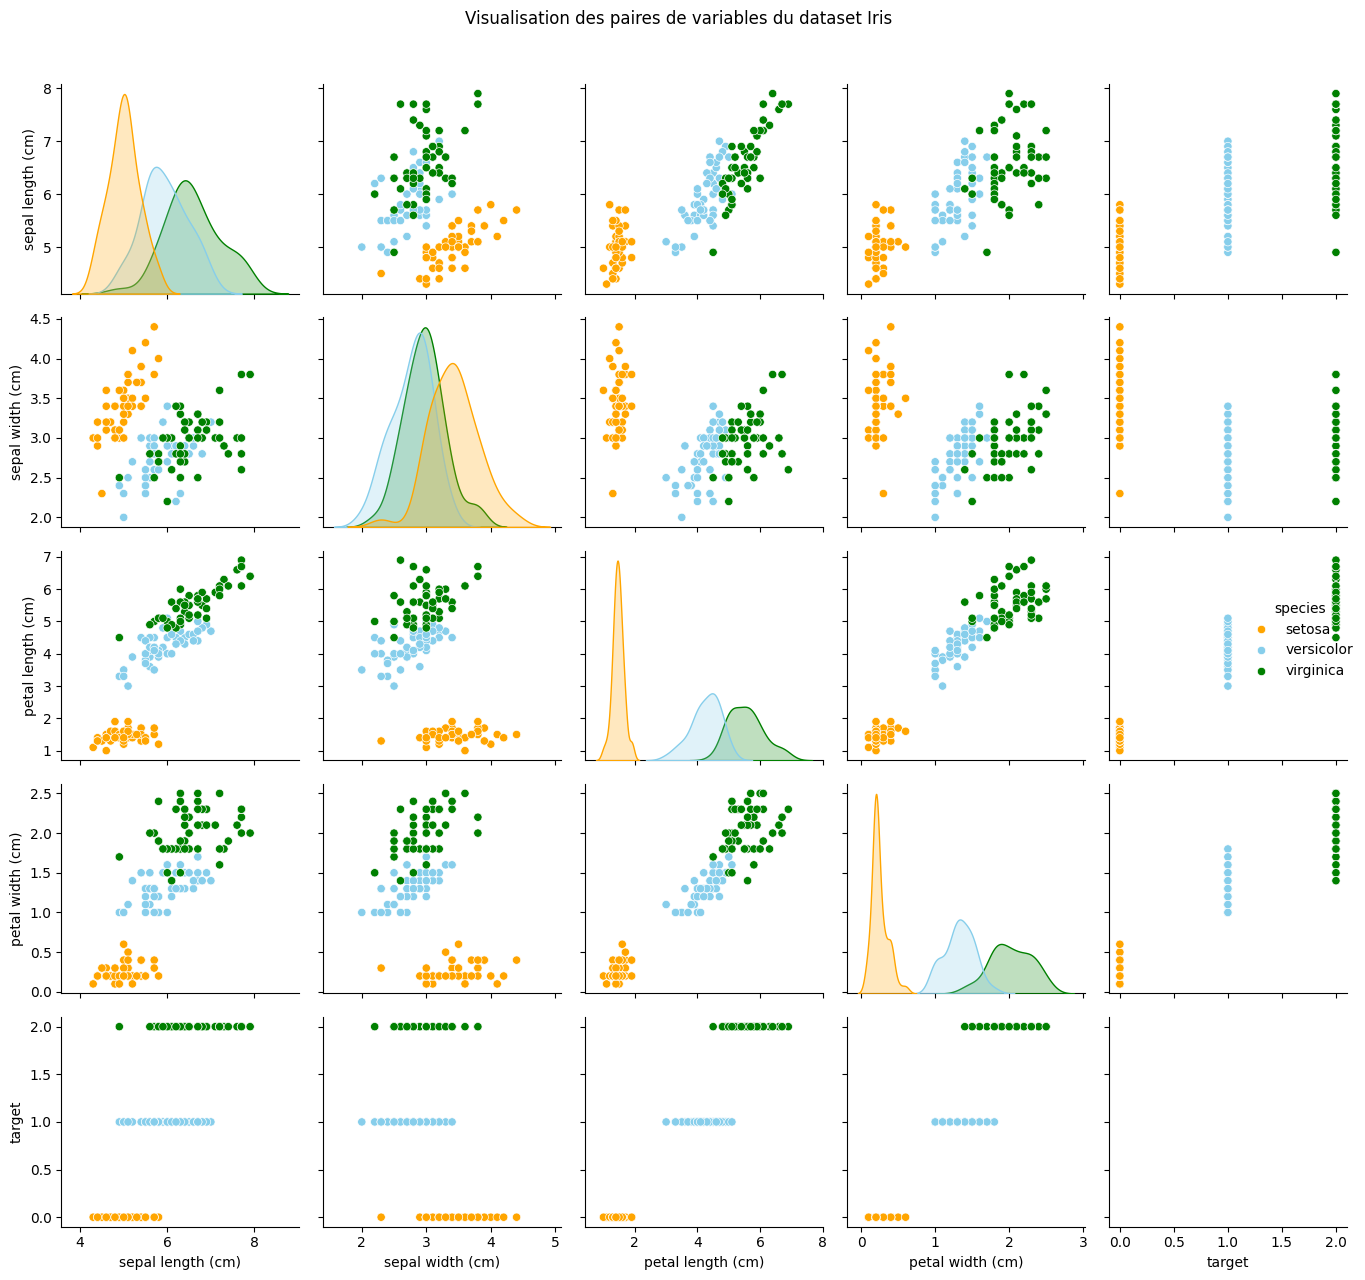

In [13]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue='species',palette={'setosa':'orange','versicolor':'skyblue','virginica':'green'})
plt.suptitle('Visualisation des paires de variables du dataset Iris', y=1.02)
plt.tight_layout()
plt.show()

#### Identification de la meilleure combinaison visuellement (longueur et largeur de pétales)

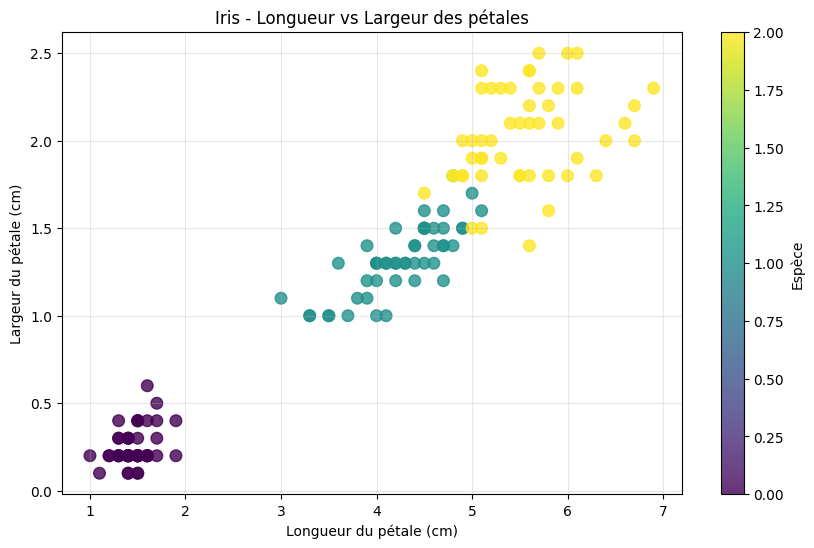

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['target'], cmap='viridis', s=70, alpha=0.8)
plt.title('Iris - Longueur vs Largeur des pétales')
plt.xlabel('Longueur du pétale (cm)')
plt.ylabel('Largeur du pétale (cm)')
plt.colorbar(label='Espèce')
plt.grid(True, alpha=0.3)
plt.show()

## Question 3
#### Application de k-Means avec k=3

In [16]:
model = KMeans(n_clusters=3,random_state=42)
model.fit(X)
labels = model.labels_

## Question 4 
#### Détermination du nombre d'iterations

In [17]:
print("Nombre d'iteration ", model.n_iter_ )

Nombre d'iteration  11


## Question 5
#### Affichage des clusters et conteroides

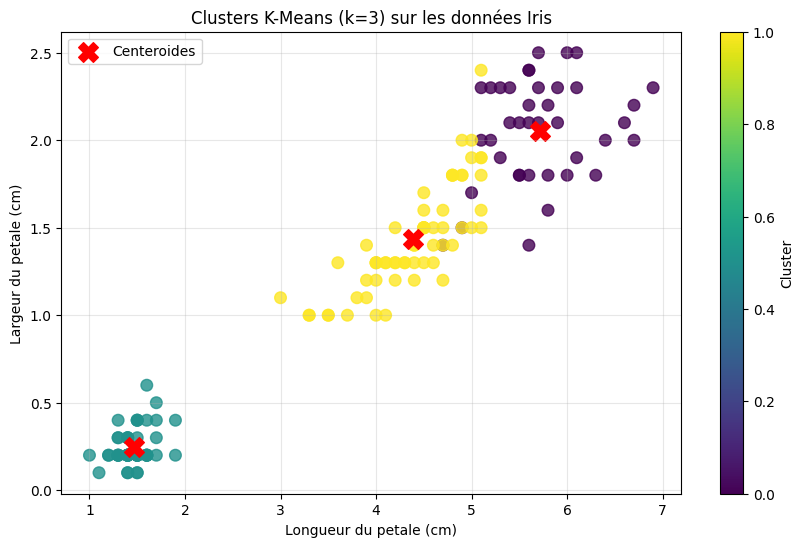

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=labels, cmap='viridis', s=70, alpha=0.8)
plt.scatter(model.cluster_centers_[:,2], model.cluster_centers_[:,3], c='red', marker='X', s=200, label='Centeroides')
plt.title('Clusters K-Means (k=3) sur les données Iris')
plt.xlabel('Longueur du petale (cm)')
plt.ylabel('Largeur du petale (cm)')
plt.legend()
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

## Question 6 
#### Matrice de confusion 

In [27]:
conf_matrix=confusion_matrix(y,labels)

In [28]:
print('\nMatrice de confusion :')
print(conf_matrix)


Matrice de confusion :
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


#### Visualisation améliorée de la matrice de confusion

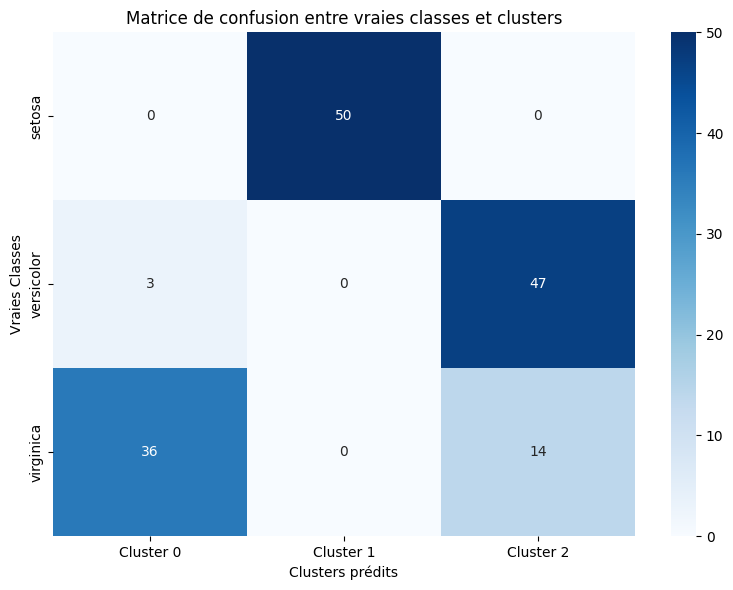

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0','Cluster 1','Cluster 2'], yticklabels=target_names)
plt.title('Matrice de confusion entre vraies classes et clusters')
plt.xlabel('Clusters prédits')
plt.ylabel("Vraies Classes")
plt.tight_layout()
plt.show()

<span style="color:red">Remarque : </span> Le clustering identifie parfaitement la classe Setosa (Cluster 1), mais peine à distinguer Versicolor et Virginica.

## Question 7
#### Evaluation du clustering en utilisant :
##### <span style="color:blue">Normalized Mutual Information :</span> Mesure à quel point les clusters et les vraies classes partagent des informations (0 = indépendants, 1 = parfait accord)
##### <span style="color:blue"> Adjusted Rand Index :</span> Compare les paires d'échantillons bien/mal regroupées par rapport aux vraies classes (0 = aléatoire, 1 = parfait))
##### <span style="color:blue">Silhouette Score :</span> Évalue la cohérence interne des clusters (densité et séparation). Entre -1 (mauvais) et +1 (excellent)

In [34]:
nmi = normalized_mutual_info_score(y, labels)
ari = adjusted_rand_score(y, labels)
silhouette = silhouette_score(X, labels)

In [35]:
print("Evaluation du clustering:")
print(f"Normalized Mutual Information (NMI):{nmi:.4f}")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Silhouette Score : {silhouette:.4f}")

Evaluation du clustering:
Normalized Mutual Information (NMI):0.7419
Adjusted Rand Index (ARI): 0.7163
Silhouette Score : 0.5512


<span style="color:red">Remarque : </span> NMI et ARI sont élevés ce qui signifie que le clustering correspond bien aux vraies classes malgré quelques erreurs. Silhouette score est 0.55, ce qui signifie que les clusterss sont raisonnablement denses, mais pas parfaits. 

## Question 8
#### Methode du coude

In [37]:
distortions = []
silhouettes = []
k_range = range(2,11)

for k in k_range : 
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X)
    distortions.append(kmeans_model.inertia_)

    #calcul du score de silhouette pour chaque k
    if k > 1 : 
        silhouettes.append(silhouette_score(X, kmeans_model.labels_))


#### Visualisation 

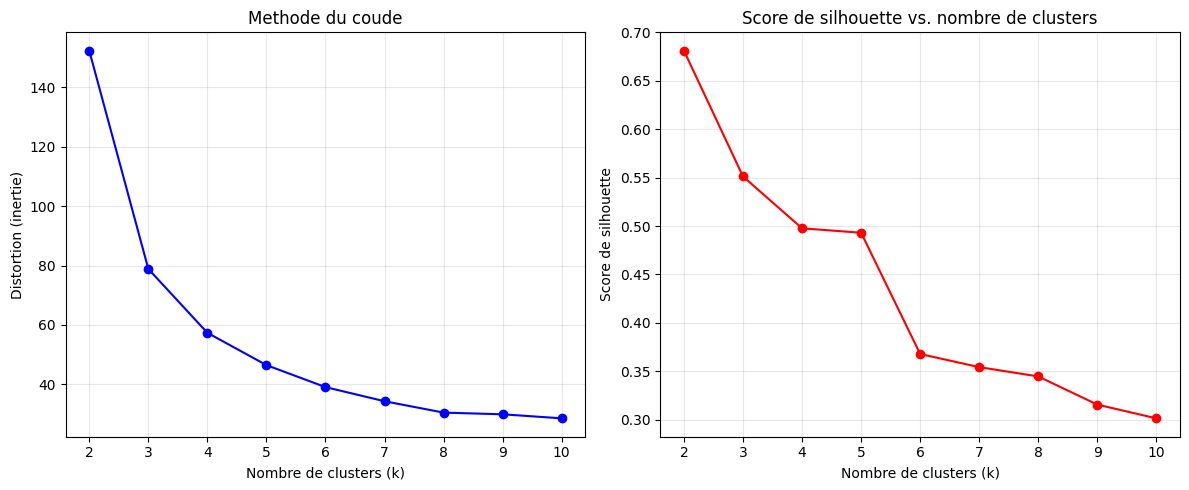

In [39]:
plt.figure(figsize=(12,5))

#methode du coude
plt.subplot(1,2,1)
plt.plot(k_range, distortions, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Distortion (inertie)')
plt.title('Methode du coude')
plt.grid(True, alpha=0.3)

#score de silhouette
plt.subplot(1,2,2)
plt.plot(k_range, silhouettes, 'ro-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette vs. nombre de clusters')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()